In [12]:
import csv
import re
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
import pandas as pd

# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler
import seaborn

plt.style.context("seaborn-whitegrid")
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.25
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [74]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/'
# bindir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/'
# chr_accu_length_f = f'{wkdir}chromosome_accumulative_length.txt'
chromosomef = f'{wkdir}chromosome_coordinates.txt'

# # this removed germline cnvs
# tcga_cn_file = '/home/szong/bin/GISTIC_2_0_22/tcga/segmentationfile.txt'
# # tcga_cn_file is extracted from below minus_germline files downloaed from firebrowse
# # tcga_cn_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_cn/gdac.broadinstitute.org_CESC.Merge_snp__genome_wide_snp_6__broad_mit_edu__Level_3__segmented_scna_minus_germline_cnv_hg19__seg.Level_3.2016012800.0.0/CESC.snp__genome_wide_snp_6__broad_mit_edu__Level_3__segmented_scna_minus_germline_cnv_hg19__seg.seg.txt'
# # tcga_cn_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_cn/gdac.broastart = 'cum_start'
end = 'cum_end'
value = 'pct'dinstitute.org_CESC.Merge_snp__genome_wide_snp_6__broad_mit_edu__Level_3__segmented_scna_hg19__seg.Level_3.2016012800.0.0/CESC.snp__genome_wide_snp_6__broad_mit_edu__Level_3__segmented_scna_hg19__seg.seg.txt'
# tcga_core_sample_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/tcga_cn/TCGA_178_core_samples.txt'
# htmcp_hiv_neg_file = '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_neg/segmentationfile.txt'
# htmcp_hiv_pos_file = '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_pos/segmentationfile.txt'
# # htmcp_file = '/home/szong/bin/GISTIC_2_0_22/gatk_118_patients/segmentationfile.txt'
hivpos_uniqamp_armsf = f'{wkdir}hivpos_uniqamp_arms_{arm_threshold}.txt'
hivneg_uniqamp_armsf = f'{wkdir}hivneg_uniqamp_arms_{arm_threshold}.txt'
hivpos_uniqdel_armsf = f'{wkdir}hivpos_uniqdel_arms_{arm_threshold}.txt'
hivneg_uniqdel_armsf = f'{wkdir}hivneg_uniqdel_arms_{arm_threshold}.txt'
tcga_uniqdel_armsf = f'{wkdir}tcga_uniqdel_arms_{arm_threshold}.txt'
tcga_uniqamp_armsf = f'{wkdir}tcga_uniqamp_arms_{arm_threshold}.txt'
hivneg2_uniqdel_armsf = f'{wkdir}hivneg2_uniqdel_arms_{arm_threshold}.txt'
hivneg2_uniqamp_armsf = f'{wkdir}hivneg2_uniqamp_arms_{arm_threshold}.txt'



In [48]:
chrdf = pd.read_csv(chromosomef)
chrdf.columns = ['start', 'end', 'chrom']
chrdf[:2]

,start,end,chrom
0,0,249250621.0,1
1,249250621,492449994.0,2


matlab :  /gsc/software/linux-x86_64-centos5/matlab-2013a/bin/matlab

In [49]:
amp_threshold = 0.25 # suggested by Andrew Cherniack
del_threshold = -0.25
arm_threshold = 0.25
num_tcga_patients = 177
num_htmcp_patients = 118
num_htmcp_hiv_pos_patients = 73
num_htmcp_hiv_neg_patients = 45

In [50]:
f2_1 = '/home/szong/projects/resource/chrominfo.txt'
df2_1 = pd.read_csv(f2_1, sep='\t', usecols=['#chrom', 'size'])
df2_1['chr'] = df2_1['#chrom'].apply(lambda x: x.replace('chr', ''))
chr_sizes = df2_1.set_index('chr').drop('#chrom', axis=1)
chr_sizes = chr_sizes.reset_index().replace('X', '23').replace('Y', '24').iloc[:24,].set_index('chr')
chr_sizes.index = chr_sizes.index.astype(int)
chr_sizes = chr_sizes.sort_index()
chr_sizes.head(2)
# initiate occupied label coordinates dict
chr_length = chr_sizes['size']#.astype(str)
y_coords = np.arange(7, .5, -0.5)

,size
chr,
1,249250621
2,243199373


In [ ]:
# plot baseline
start = 0
end = 0
# baseline = 1
vlns = []
mpnts = []
for ch, length in enumerate(chr_length[:-1]):
    ch+=1
    end+=length
    midpoint = (start + end)/2
    mpnts.append(midpoint)
#     _ = ax0.text(midpoint, 1, ch, ha='center')
    if ch %2 == 1:
        vlns.append(start)
        vlns.append(end)
#         _ = fill([start, end, end, start], [0, 0, 11, 11], 'b', alpha=0.1, edgecolor='b')
#         _= ax0.vlines(start, 0, 10, color='gray', linestyle='--', linewidth=.5)
#         _= ax0.vlines(end, 0, 10, color='gray', linestyle='--', linewidth=.5)
    start+=length
#     _ = ax0.text(midpoint, 1, ch, ha='center')


# chromosome arm coordinates
f = f'{wkdir}chromosome_arm_coordinates.txt'
arm_coords = pd.read_csv(f, sep='\t')
arm_coords[:2]

In [77]:
# unique arm level alterations


hivpos_uniqamp_arms = pd.read_csv(hivpos_uniqamp_armsf, header=None)[0].tolist()
hivpos_uniqamp_arms

hivneg_uniqamp_arms = pd.read_csv(hivneg_uniqamp_armsf, header=None)[0].tolist()
hivneg_uniqamp_arms

# no hivneg uniq del 
# hivneg_uniqdel_arms = pd.read_csv(hivneg_uniqdel_armsf, header=None)[0].tolist()
# hivneg_uniqdel_arms

hivpos_uniqdel_arms = pd.read_csv(hivpos_uniqdel_armsf, header=None)[0].tolist()
hivpos_uniqdel_arms

tcga_uniqdel_arms = pd.read_csv(tcga_uniqdel_armsf, header=None)[0].tolist()
tcga_uniqdel_arms

# no tcga uniqamp events
# tcga_uniqamp_arms = pd.read_csv(tcga_uniqamp_armsf, header=None)[0].tolist()
# tcga_uniqamp_arms

# hivneg2  
hivneg2_uniqdel_arms = pd.read_csv(hivneg2_uniqdel_armsf, header=None)[0].tolist()
hivneg2_uniqdel_arms

hivneg2_uniqamp_arms = pd.read_csv(hivneg2_uniqamp_armsf, header=None)[0].tolist()
hivneg2_uniqamp_arms

['6p', '16p', '14q', '9q', '16q', '9p']

['3p', '15q']

['13q', '5q', '21q', '4q']

['22q', '17p', '5q', '4q', '6q', '3q', '10q', '13q', '18q', '8p', '9p']

['21p']

['3p', '8p', '15q']

### try to use gistic thresholded data for cn landscape

In [52]:
# use gistic refgenefile including both the cytoband and ref genes
f1 = '/projects/da_workspace/software/gistic/rg.txt'
df1 = pd.read_csv(f1)
df1.head(2)
df1 = df1.set_index(['chrn', 'start', 'nd'])
df1 = df1.loc[~df1.index.duplicated(keep='first')].reset_index()
df1 = df1[df1.chrn != 24]

,refseq,gene,symb,locus_id,chr,strand,start,nd,cds_start,cds_end,status,chrn
0,NM_000014,alpha-2-macroglobulin precursor,A2M,2,chr12,0,9220303,9268558,9220418,9268445,Reviewed,12
1,NM_000015,arylamine N-acetyltransferase 2,NAT2,10,chr8,1,18248754,18258723,18257513,18258386,Reviewed,8


In [53]:
def get_gene_cn(f):
    df = pd.read_csv(f, sep='\t')#, index_col='Gene Symbol')
    return df

In [54]:
def get_gene_coord(df1, df2):
    df3 = pd.merge(df1, df2, left_on='symb', right_on='Gene Symbol')
    df3 = df3.sort_values(['chrn', 'start'])
    cols = ['refseq', 'gene', 'locus_id', 'symb', 'chr', 'strand', 'cds_start', 'cds_end', 'status' ]
    return df3.drop(cols, axis=1)

In [55]:
# df4 = get_gene_coord(df1, df2)

In [56]:
f5 = '/home/szong/projects/resource/chromosome_accumulative_length.txt'
df5 = pd.read_csv(f5, sep='\t').drop(['chrom', 'length'], axis=1).set_index(np.arange(1,26, 1))
df5.head(2)

,cumulative_length
1,0
2,249250621


In [57]:
def get_cumulative_coord(df1, df2):
    df3 = pd.merge(df1, df2, left_on='chrn', right_index=True)
    df3['cum_start'] = df3['cumulative_length'] + df3['start']
    df3['cum_end'] = df3['cumulative_length'] + df3['nd']
    cols = ['start', 'nd', 'chrn', 'Gene Symbol', 'Locus ID', 'Cytoband', 'cumulative_length']
    return df3.drop(cols, axis=1).sort_values('cum_start')

In [58]:
# df6 = get_cumulative_coord(df4, df5)

In [59]:
# df6[df6.Cytoband.str.startswith('21')].head(2)

In [144]:
def get_pct_amplitude(df, cn_type, num_patients):
    dfsub = df.iloc[:,:-2]
    if cn_type == 'del':
        df['sum'] = dfsub[dfsub<0].sum(axis=1)
        df['count'] = (dfsub <0).sum(axis=1)
    elif cn_type == 'amp':
        df['sum'] = dfsub[dfsub>0].sum(axis=1)
        df['count'] = (dfsub >0).sum(axis=1)
    df['pct'] = df['count']/num_patients
    df['amplitude'] = df['sum']/df['count']
    return df


In [61]:
# df7 = get_pct_amplitude(df6, 'del', 177)

In [62]:
def prep_cn(gene_cn_file, ref_gene_df, cum_coord_df, cn_type, num_patients):
    df2 = get_gene_cn(gene_cn_file)
    df4 = get_gene_coord(ref_gene_df, df2)
    df6 = get_cumulative_coord(df4, cum_coord_df)
    df7 = get_pct_amplitude(df6, cn_type, num_patients)
    return df7

In [237]:
def plot_cnv(ax, ax_twin, baseline, amps, dels, num_patients, vlns):
    ticks = [0, 0.4, 0.8, 1.2, 1.6]
    ticklabels = [0.8, 0.4, 0, 0.4, 0.8]
    ax.set_yticks(ticks, minor=False)
    ax.set_yticklabels(ticklabels, minor=False)
    # ax.set_frame_on(False) # this turn off frame
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    # Hide the right and top spines for ax_twin
    ax_twin.spines['left'].set_visible(False)
    ax_twin.spines['top'].set_visible(False)
    ax_twin.spines['bottom'].set_visible(False)
    ax_twin.axes.get_xaxis().set_visible(False)
    _ = ax.hlines(baseline, 0, vlns[-2], color='black', linewidth=.7)
    for vl in vlns:
        _ = ax.vlines(vl, 0, 1.6, color='gray', linestyle='--', linewidth=.5)
    
    coordinates, fractions = fill_gaps(dels, 'cum_start', 'cum_end', 'pct')
    coordinates, amplitudes = fill_gaps(dels, 'cum_start', 'cum_end', 'amplitude')
#     coordinates, fractions, amplitudes = get_coords_fracs(dels)
#     print(coordinates[:20], fractions[:20])
    plot_fraction(coordinates, fractions, amplitudes, baseline, 'dels', ax, ax_twin)
    
    coordinates, fractions = fill_gaps(amps, 'cum_start', 'cum_end', 'pct')
    coordinates, amplitudes = fill_gaps(amps, 'cum_start', 'cum_end', 'amplitude')
#     coordinates, fractions, amplitudes = get_coords_fracs(amps)
    plot_fraction(coordinates, fractions, amplitudes, baseline, 'amps', ax, ax_twin)
    
    

In [245]:
def plot_fraction(coordinates, fractions,amplitudes, baseline, cnv_type, ax, ax2):
    baseline_postions = [baseline] * len(coordinates)
    if cnv_type.lower() == 'amps':
        fractions = baseline + np.array(fractions)
        color = 'red'
    elif cnv_type.lower() == 'dels':
        fractions = baseline - np.array(fractions)
        color = 'blue'
    ax.fill_between(coordinates, 
                    fractions, 
                    baseline_postions, 
                    color=color, 
                    alpha=1)
    ax2.scatter(coordinates, amplitudes, c='green', s=0.15)

In [246]:
def plot_arms(arms, arm_coords, ax, alteration_type, edgeclr, offset, mk): # w/o border
    for arm in arms:
        df = arm_coords[arm_coords['chr_arm']==arm]
#         print(df)
        start = df.loc[df.index[0], 'start']
        end = df.loc[df.index[0], 'end']
        if alteration_type.lower() == 'amp':
            faceclr = 'red'
            y1 = 0.8
            y2 = 1.5
        elif alteration_type.lower() == 'del':
            faceclr = 'blue'
            y1 = 0
            y2 = 0.1
        else: print("Error! invalid copy number type.")
        
#         print(arm, start, end)
        ax.plot(start+offset, y2, color='black', marker=mk, markersize=5)
        ax.add_patch(matplotlib.patches.Rectangle((start,y1), end-start, 0.8,  
                                                  edgecolor=edgeclr, facecolor=faceclr, 
                                                  alpha=0.3, linewidth=2))


In [72]:
def plot_chromosomes(df, ax):
    # plot chromosome names


    # plot chromosomes rectangles
    chr_clrs = ['white' if i%2==0 else 'black' for i in df['chrom'] ]
    text_clrs = chr_clrs + ['white']
#     print(chr_clrs)
#     print(text_clrs)
    for ix, row in df.iterrows():
        chrom = int(row.chrom)
        start = row.start
        end = row.end

        _ = ax.add_patch(matplotlib.patches.Rectangle((start,0), end-start, 1.6,  
                                              edgecolor='gray', facecolor=chr_clrs[chrom-1], 
                                              alpha=1, linewidth=2))
        if chrom <= 23:
            _ = ax.text(int((start + end)/2), 0.6, chrom, ha='center', color=text_clrs[chrom])
        else:
            _ = ax.text(int((start + end)/2), 0.6, 'X', ha='center', color=text_clrs[chrom])
            

In [165]:
f2 = '/home/szong/bin/GISTIC_2_0_22/tcga/all_thresholded.by_genes.txt'
tcga_del = prep_cn(f2, df1, df5, 'del', num_tcga_patients)
tcga_amp = prep_cn(f2, df1, df5, 'amp', num_tcga_patients)

f2 = '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_neg/all_thresholded.by_genes.txt'
htmcp_hiv_neg_recur_dels = prep_cn(f2, df1, df5, 'del', num_htmcp_hiv_neg_patients)
htmcp_hiv_neg_recur_amps = prep_cn(f2, df1, df5, 'amp', num_htmcp_hiv_neg_patients)

f2 = '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_pos/all_thresholded.by_genes.txt'
htmcp_hiv_pos_recur_dels = prep_cn(f2, df1, df5, 'del', num_htmcp_hiv_pos_patients)
htmcp_hiv_pos_recur_amps = prep_cn(f2, df1, df5, 'amp', num_htmcp_hiv_pos_patients)

In [166]:
tcga_del.head(2)
tcga_amp.head(2)

,TCGA-BI-A0VR-01A,TCGA-BI-A0VS-01A,TCGA-BI-A20A-01A,TCGA-C5-A0TN-01A,TCGA-C5-A1BE-01B,TCGA-C5-A1BF-01B,TCGA-C5-A1BI-01B,TCGA-C5-A1BJ-01A,TCGA-C5-A1BK-01B,TCGA-C5-A1BL-01A,...,TCGA-Q1-A73R-01A,TCGA-Q1-A73S-01A,TCGA-R2-A69V-01A,TCGA-RA-A741-01A,cum_start,cum_end,sum,count,pct,amplitude
24745,1,1,0,-1,0,0,1,0,0,-1,...,0,0,0,0,14361,29370,-25.0,23,0.129944,-1.086957
27814,1,1,0,-1,0,0,1,0,0,-1,...,0,0,0,0,30365,30503,-25.0,23,0.129944,-1.086957


,TCGA-BI-A0VR-01A,TCGA-BI-A0VS-01A,TCGA-BI-A20A-01A,TCGA-C5-A0TN-01A,TCGA-C5-A1BE-01B,TCGA-C5-A1BF-01B,TCGA-C5-A1BI-01B,TCGA-C5-A1BJ-01A,TCGA-C5-A1BK-01B,TCGA-C5-A1BL-01A,...,TCGA-Q1-A73R-01A,TCGA-Q1-A73S-01A,TCGA-R2-A69V-01A,TCGA-RA-A741-01A,cum_start,cum_end,sum,count,pct,amplitude
24745,1,1,0,-1,0,0,1,0,0,-1,...,0,0,0,0,14361,29370,50.0,50,0.282486,1.0
27814,1,1,0,-1,0,0,1,0,0,-1,...,0,0,0,0,30365,30503,50.0,50,0.282486,1.0


In [ ]:
tcga_del[dcga_del.columns.str.startswith('TCGA')]

In [69]:
tcga_amp.del_amplitude.describe()

count    27964.000000
mean         1.025785
std          0.042873
min          1.000000
25%          1.000000
50%          1.000000
75%          1.040000
max          1.566667
Name: del_amplitude, dtype: float64

In [243]:
def plot_frac_amplitude(ax, amps, dels, num_patients):
    ax_twin = ax.twinx()
    plot_cnv(ax, ax_twin, baseline, amps, dels, num_patients, vlns)
#     if not uniq_del_arms:
#         plot_arms(uniq_del_arms, arm_coords, ax, 'del', 'white', 9e6,'+')
#     if not uniq_del_arms:
#     plot_arms(uniq_amp_arms, arm_coords, ax1, 'amp', 'white', 9e6, '*')
    _ = ax.set_xlim(xlims)
    _ = ax.set_ylim(ylims)
    _ = ax_twin.set_xlim(xlims)
    _ = ax_twin.set_ylim(-1.8, 1.8)

In [209]:
def get_coords_fracs(df):
    coordinates = np.array(df[['cum_start', 'cum_end']]).flatten()
    fractions = np.array(df[['pct', 'pct']]).flatten()
    amplitudes = np.array(df[['amplitude', 'amplitude']]).flatten()
    return (coordinates, fractions, amplitudes)

In [189]:

def fill_gaps(df, start, end, value):
    dft = df[[start, end, value]]
    dft['d'] = dft[end].shift()
    dfu = dft[['d', start]].drop(0)
    dfu = dfu[dfu[start] - dfu['d'] >1]
    dfu['e'] = 0
    dfv = dft.drop('d', axis=1)
    dfu.columns = dfv.columns
    dfw = pd.concat([dfv, dfu]).sort_values(start)
    cs = np.array(dfw[[start, end]]).flatten()
    vs = np.array(dfw[[value, value]]).flatten()
    return cs, vs

(0.0, 1.0, 0.0, 1.0)

(0, 3188119038.3) (0, 1.6)


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


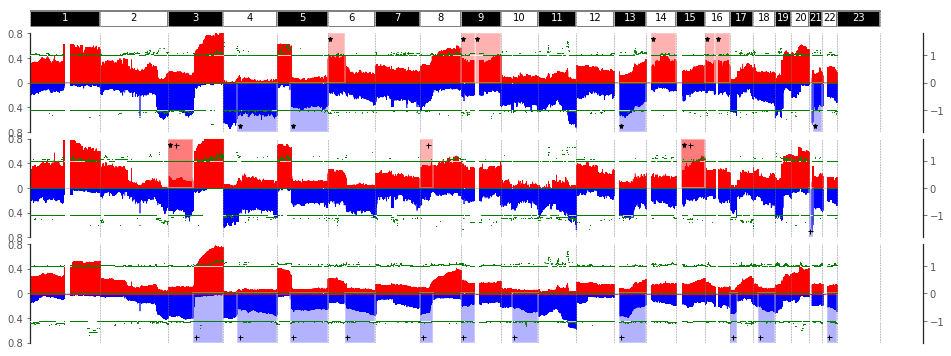

In [249]:
baseline = 0.8
fig = plt.figure(figsize=(16, 10), facecolor='white')
gs = gridspec.GridSpec(6, 1, height_ratios=[1, 6, 6, 6, 6, 6], 
                       hspace=0.08)  # vertical space

# plot chromosomes
ax0 = plt.subplot(gs[0], facecolor='white')
ax0.axis('off')
chrdf = chrdf.iloc[:23,:]

# figuring out xlim and ylim
for vl in vlns:
    _ = ax0.vlines(vl, 0, 1.6, color='white', linestyle='--', linewidth=.5)
xlims = (0, ax0.get_xlim()[1])
ylims = (0, ax0.get_ylim()[1])
_= ax0.set_xlim(xlims)
_ = ax0.set_ylim(ylims)
ylims = (0,1.6)
print(xlims, ylims)
plot_chromosomes(chrdf, ax0)


# # plot htmcp cnvs hiv+ 73 patients
ax1 = plt.subplot(gs[1], facecolor='white')
plot_frac_amplitude(ax1, htmcp_hiv_pos_recur_amps, htmcp_hiv_pos_recur_dels, num_htmcp_hiv_pos_patients)
plot_arms(hivpos_uniqamp_arms, arm_coords, ax1, 'amp', 'white', 9e6, '*')
plot_arms(hivpos_uniqdel_arms, arm_coords, ax1, 'del', 'white', 9e6, '*')

# # # plot htmcp cnvs hiv- 45 patients
ax2 = plt.subplot(gs[2], facecolor='white')
plot_frac_amplitude(ax2, htmcp_hiv_neg_recur_amps, htmcp_hiv_neg_recur_dels, num_htmcp_hiv_neg_patients)
plot_arms(hivneg_uniqamp_arms, arm_coords, ax2, 'amp', 'white', 9e6, '*')
plot_arms(hivneg2_uniqamp_arms, arm_coords, ax2, 'amp', 'white', 3e7, '+')
plot_arms(hivneg2_uniqdel_arms, arm_coords, ax2, 'del', 'white', 3e6, '+')

# plot tcga cnvs
ax3 = plt.subplot(gs[3], facecolor='white')
plot_frac_amplitude(ax3, tcga_amp, tcga_del, num_tcga_patients)
plot_arms(tcga_uniqdel_arms, arm_coords, ax3, 'del', 'white', 9e6,'+')

# plt.savefig(f'{wkdir}cnvs_publication_gistic_genes_thresholded.pdf', dpi=300, bbox_inches='tight')
plt.savefig(f'{wkdir}cnvs_publication_gistic_genes_thresholded_20190509.png', dpi=300, bbox_inches='tight')

In [170]:
htmcp_hiv_pos_recur_amps[:2]

,HTMCP-03-06-02414,HTMCP-03-06-02435,HTMCP-03-06-02261,HTMCP-03-06-02216,HTMCP-03-06-02057,HTMCP-03-06-02428,HTMCP-03-06-02058,HTMCP-03-06-02113,HTMCP-03-06-02238,HTMCP-03-06-02260,...,HTMCP-03-06-02344,HTMCP-03-06-02213,HTMCP-03-06-02179,HTMCP-03-06-02001,cum_start,cum_end,sum,count,pct,amplitude
24745,-1,0,0,-1,1,0,0,0,1,0,...,-1,0,0,1,14361,29370,22.0,21,0.287671,1.047619
27814,-1,0,0,-1,1,0,0,0,1,0,...,-1,0,0,1,30365,30503,22.0,21,0.287671,1.047619


In [ ]:
tcga_uniqdel_arms

### beow outdated

In [187]:
arr = np.array(([1,2, 0.2], [5,6, 0.4], [7,8, 0.8]))
dft = pd.DataFrame(arr, columns=['cum_start', 'cum_end', 'pct'])
dft


,cum_start,cum_end,pct
0,1.0,2.0,0.2
1,5.0,6.0,0.4
2,7.0,8.0,0.8


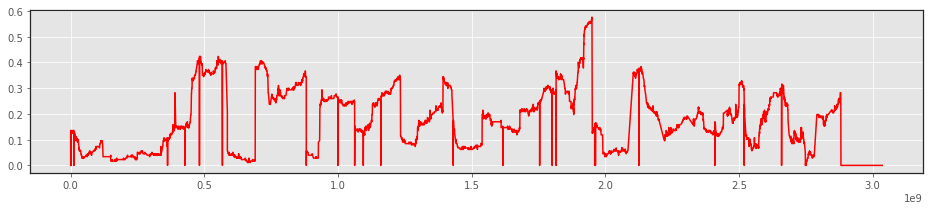

In [24]:
f, ax = plt.subplots(figsize=(16, 3))
plt.plot(df7.cum_start, df7.del_pct, 'r')

In [103]:
df7.head(2)

,TCGA-BI-A0VR-01A,TCGA-BI-A0VS-01A,TCGA-BI-A20A-01A,TCGA-C5-A0TN-01A,TCGA-C5-A1BE-01B,TCGA-C5-A1BF-01B,TCGA-C5-A1BI-01B,TCGA-C5-A1BJ-01A,TCGA-C5-A1BK-01B,TCGA-C5-A1BL-01A,...,TCGA-Q1-A6DW-01A,TCGA-Q1-A73O-01A,TCGA-Q1-A73P-01A,TCGA-Q1-A73Q-01A,TCGA-Q1-A73R-01A,TCGA-Q1-A73S-01A,TCGA-R2-A69V-01A,TCGA-RA-A741-01A,cum_start,pct
39323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11873,0.000000
34757,1.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14361,0.129944


# 1. TCGA copy number

1. i can load the gatk seg file into igv for visualization. the file extension needs to be .seg

2. decided to use the TCGA file with germline CNVs removed for the comparison I used the same TCGA curated germline events to filter out germline events from HTMCP cohort as well. 

3. i downloaded the population CNVS here: is this from 1000 genomes
/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/population_cnv.txt

4. tcga core data freeze list: 178 samples with SNP6 array copy number data. extended data include additional 50 samples.

5. snp6 copy number analysis was applied to the 178 core samples. in supplimentary, it states "Somatic copy number alterations in 178 CESC tumors were determined with SNP 6.0 arrays. "

<font color='red'>
6. TCGA excluded peaks with more than 30 genes. also TCGA removed germline CNVs
</font>

7. GISTIC2.0 amplification and deletion plots within copy number clusters. Chromosomal locations for peaks of significantly recurrent focal amplifications (red) and deletions (blue) are plotted by −log10 q value for the high (CN High) and low (CN Low) copy number clusters. Peaks are annotated with cytoband and candidate driver genes. The total number of genes in the peak region is indicated in parentheses. Peaks with more than 30 genes in the peak region are excluded. Any genes annotated have a significant positive correlation with mRNA expression

data can be download here:

http://firebrowse.org/

http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/CESC/20160128/

in firbrowse, there are 295 samples with snp6 copy number results including 586 tumour or normals. not sure why. but it makes sense to have normals in this file because copy number ratio is standardardized to a panel of normals. so normals can be compared to the panel as well.

copy number analysis GISTIC results are here with 295 patients:
http://gdac.broadinstitute.org/runs/analyses__2016_01_28/reports/cancer/CESC-TP/CopyNumber_Gistic2/nozzle.html

TCGA CESC had 178 core samples plus 50 extended cases. but in firebrowse we got 295 samples for the cesc. not sure why. i am confused. so to keep it simple, I will stick to the 178 samples for the purposes of comparison with HTMCP. the 178 core samples include both squamous and adeno cases. so not like we only look at squamous cases. should be fine.

decide which file to use. 
"_scna_minus_germline_cnv_" has much less rows, indicating germline cnvs were removed. maybe one normal against a panel of normal can detect germline cnvs, so the file excluded these events. When we run our HTMCP cohort, we did not remove germline cnvs, so i think i should use the other file which include germline cnvs. 

to determine if a segment is amplfied or deleted based on the segment_mean value, (logT/N ratio). I tend to use cutoffs; amp>=0.58= log2(3/2); del <=-1=log2(1/2), this seems to be too stringent. 

following paper used 0.25 for copy gain and -0.25 for copy loss.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4392457/
There are no standardised log2 ratio cut-offs to define low-amplitude copy number gain/loss and high amplitude amplification/deletion. Based on the available published literature, we used a log2 ratio cut-off of +/− 0.25 to define copy number gain/loss and a log2 ratio cut-off of +/− 0.8 to define amplification and deletion [7,18,19].

https://www.nature.com/articles/nature20805
esophageal copy number comparison with ESCC and EAC

this google post has some useful information as well:
https://groups.google.com/a/broadinstitute.org/forum/#!topic/gdac-users/__zdXDE-Z5U

this talks about the germline CNVs identified in 1000 genomes.
https://www.biostars.org/p/174343/

this describes how GISTIC works:
http://www.pnas.org/content/104/50/20007.full


Copy number analysis
DNA from each tumour or germline sample was hybridized to Affymetrix SNP 6.0 arrays using protocols at the Genome Analysis Platform of the Broad Institute as previously described51. Briefly, Birdseed was used to infer a preliminary copy number at each probe locus from raw .cel files52. For each tumour, genome-wide copy number estimates were refined using tangent normalization, in which tumour signal intensities are divided by signal intensities from the linear combination of all normal samples that are most similar to the tumour16. Individual copy number estimates then underwent segmentation using circular binary segmentation53, and segmented copy number profiles for tumour and matched control DNAs were analysed using Ziggurat Deconstruction54. Significance of copy number alterations were assessed from the segmented data using GISTIC2.0 (version 2.0.22)54. For the purpose of this analysis, an arm-level event was defined as any event spanning more than 50% of a chromosome arm. For copy number-based clustering, tumours were clustered based on copy number at regions using GISTIC analysis. Clustering was done in R on the basis of Euclidean distance using Ward’s method. Allelic and integer copy number, tumour purity and tumour ploidy were calculated using the ABSOLUTE algorithm55.



# ARE THESE THRESHOLDS  REASONABLE?
remember now the final version we only want 3 tracks, the comparison is tcga vs hiv- and hiv+ vs hiv-

# goals

* to display the copy number landscape using gatk cnv results
* to compare significant arm level alterations among three groups: tcga, htmcp hiv+, and htmcp hiv-, all comparisons are made against hiv- group

# constants

# files

# 3. plot cnvs

In [124]:
def plot_cytobands(df, ax, clr, y_coord):
    """
    keep in mind sometime notebook does render properly, some lines seem missing, 
    but it will show up when you open the png file. 
    """
    for ix, row in df.iterrows():
        chrom = row.chr
        start = row.start
        end = row.end
        cytoband = row.cytoband
        print(start, end, (end-start), cytoband)
        ax.hlines(y_coord, start, end, color=clr, linewidth=14) 

# plot cytoband

In [125]:
# plot chromosomes
f3 = '/home/szong/projects/resource/hg19_cytoband_ucsc.txt'
df_cytoband = pd.read_csv(f3, header=None, sep='\t')
df_cytoband.columns = ['chr', 'start', 'end', 'cytoband', 'comments']
df_cytoband['cytoband'] = df_cytoband.chr + df_cytoband['cytoband']
df_cytoband['chr'] = df_cytoband['chr'].replace({'X':'23', 'Y':'24'}).astype(str)

df_cytoband.head(2)
df_cytoband.tail()
df_cytoband.shape
df_cytoband.dtypes

,chr,start,end,cytoband,comments
0,1,0,2300000,1p36.33,gneg
1,1,2300000,5400000,1p36.32,gpos25


,chr,start,end,cytoband,comments
857,24,15100000,19800000,Yq11.221,gpos50
858,24,19800000,22100000,Yq11.222,gneg
859,24,22100000,26200000,Yq11.223,gpos50
860,24,26200000,28800000,Yq11.23,gneg
861,24,28800000,59373566,Yq12,gvar


(862, 5)

chr         object
start        int64
end          int64
cytoband    object
comments    object
dtype: object

In [30]:
chromosomes = pd.read_csv(chr_accu_length_f, sep='\t')
chromosomes[:4]
chromosomes.dtypes

,chrom,length,cumulative_length
0,0,0,0
1,1,249250621,249250621
2,2,243199373,492449994
3,3,198022430,690472424


chrom                int64
length               int64
cumulative_length    int64
dtype: object

In [31]:
chromosomes['end'] = chromosomes.cumulative_length.shift(-1)
chroms = chromosomes.loc[0:23,['cumulative_length','end']]
chroms['chrom'] = [i for i in range(1, 25)]
# chroms.to_csv(chromosomef, index=False)

# final plot

## get all files

In [123]:
def calculate_fractions(df):
    end = 0
    all_positions = []
    all_fractions = []
    for ch, length in enumerate(chr_length):
        ch+=1
        positions = list(end + np.array(df.iloc[df.index.get_level_values('bin_chr') == ch].index.get_level_values('bin_start').tolist()))
        all_positions = all_positions + positions
        fractions = df.iloc[df.index.get_level_values('bin_chr') == ch]['fraction_patients'].tolist()
        all_fractions = all_fractions + fractions
        end+=length
    return (all_positions, all_fractions)

In [124]:
def get_coordinates_fractions(indf, num_patients):
    df = reindex_df(indf, num_patients, df11)
    coordinates, fractions = calculate_fractions(df)
    return (coordinates, fractions)

In [125]:
def reindex_df(indf, num_patients, df11):
    df = indf.set_index(['bin_chr', 'bin_start', 'bin_end']).reindex(df11.index)
    df.fillna(0, inplace=True)
    df['fraction_patients'] = df.patient/num_patients
    df.drop('patient', inplace=True, axis=1)
    return df

In [32]:
# tcga
f = f'{wkdir}tcga_cnv_amps_bins_1kb.txt.patients'
tcga_recur_amps = pd.read_csv(f, sep='\t')
f = f'{wkdir}tcga_cnv_dels_bins_1kb.txt.patients'
tcga_recur_dels = pd.read_csv(f, sep='\t')

# hiv pos 
f = f'{wkdir}htmcp_hiv_pos_cnv_amps_bins_1kb.txt.patients'
htmcp_hiv_pos_recur_amps = pd.read_csv(f, sep='\t')
f = f'{wkdir}htmcp_hiv_pos_cnv_dels_bins_1kb.txt.patients'
htmcp_hiv_pos_recur_dels = pd.read_csv(f, sep='\t')

# hiv neg
f = f'{wkdir}htmcp_hiv_neg_cnv_amps_bins_1kb.txt.patients'
htmcp_hiv_neg_recur_amps = pd.read_csv(f, sep='\t')
f = f'{wkdir}htmcp_hiv_neg_cnv_dels_bins_1kb.txt.patients'
htmcp_hiv_neg_recur_dels = pd.read_csv(f, sep='\t')





# Take home message

1. hiv + group has more uniq arm level alterations, including both amps and dels. HIV- has 2 unique arms amplified, 3p and 15q, but no unique arm level deletions.

2. hiv- group and tcga are more similar in terms of broad copy number alterations, you can see this by examing the significant arm alterations unique to HIV+ group. 

3. tcga reports more arm deletions while htmcp reports more arm amplifications. tcga reports 9 unique arm deletions, htmcp reports 2 unique arm deletions 21pq. htmcp reports 5 unique arm amplifications.
4. keep in mind this plot does not show the amplitude of the alterations in each and all patients. it only shows the frequency. This is a limitation. it is entirely possible a region is altered at lower frequency, but very high magnitude of gain and loss. So it turns out to be more significant than the higher frequency in another cohort. GISTIC looks for both occurrence and amplitude. 
5. look at the segment_mean distribution: tcga amp mean =0.75, del=-1.2; hiv+ amp=0.62, del=-0.9; hiv- amp=0.58, del=-1.0




what the plot is showing:
1. shows somatic copy number alteration landscape in htmcp hiv+ and - group and tcga cesc cohort
2. shows the fraction of patients have copy gain or loss in each 1kb bin along the entore genome
3. copy gain is defined as gatk copy ratio of tumour to a panel of normals >0.1, and copy loss is defined as segments with copy ratio less than -0.1.
4. unique arm alterations are highlighted in both hiv+ and - group
5. unique arm alterations for tcga and htmcp are highlighted in the last panel. highlights with a black border are unique to tcga 

In [36]:
f11 = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/bin_segs/chr_bins.txt'
df11 = pd.read_csv(f11, sep='\t', header=None)
df11.columns = ['bin_chr', 'bin_start', 'bin_end']
df11.set_index(['bin_chr', 'bin_start', 'bin_end'], inplace=True)
# df11['patient'] = 0
df11.head()

Empty DataFrame
Columns: []
Index: [(1, 1, 1000), (1, 1001, 2000), (1, 2001, 3000), (1, 3001, 4000), (1, 4001, 5000)]

In [138]:
htmcp_hiv_pos_recur_amps.head(2)
htmcp_hiv_pos_recur_dels.columns


,bin_chr,bin_start,bin_end,patient
0,1,10001,11000,10
1,1,11001,12000,10


Index(['bin_chr', 'bin_start', 'bin_end', 'patient'], dtype='object')

(0.0, 1.0, 0.0, 1.0)

(0, 3188119038.3) (0, 1.6)


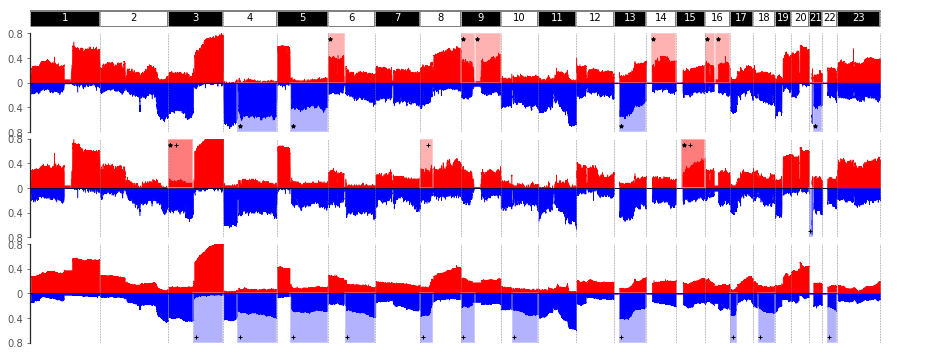

In [139]:
baseline = 0.8
fig = plt.figure(figsize=(16, 10), facecolor='white')
gs = gridspec.GridSpec(6, 1, height_ratios=[1, 6, 6, 6, 6, 6], 
                       hspace=0.08)  # vertical space

# plot chromosomes
ax0 = plt.subplot(gs[0], facecolor='white')
ax0.axis('off')
chrdf = chrdf.iloc[:23,:]

# figuring out xlim and ylim
for vl in vlns:
    _ = ax0.vlines(vl, 0, 1.6, color='white', linestyle='--', linewidth=.5)
xlims = (0, ax0.get_xlim()[1])
ylims = (0, ax0.get_ylim()[1])
_= ax0.set_xlim(xlims)
_ = ax0.set_ylim(ylims)
ylims = (0,1.6)
print(xlims, ylims)
plot_chromosomes(chrdf, ax0)

# plot htmcp cnvs hiv+ 73 patients
ax1 = plt.subplot(gs[1], facecolor='white')
plot_cnv(ax1, baseline, htmcp_hiv_pos_recur_amps, htmcp_hiv_pos_recur_dels, num_htmcp_hiv_pos_patients, vlns)
plot_arms(hivpos_uniqamp_arms, arm_coords, ax1, 'amp', 'white', 9e6, '*')
plot_arms(hivpos_uniqdel_arms, arm_coords, ax1, 'del', 'white', 9e6, '*')
_ = ax1.set_xlim(xlims)
_ = ax1.set_ylim(ylims)

# plot htmcp cnvs hiv- 45 patients
ax2 = plt.subplot(gs[2], facecolor='white')
plot_cnv(ax2, baseline, htmcp_hiv_neg_recur_amps, htmcp_hiv_neg_recur_dels, num_htmcp_hiv_neg_patients, vlns)
plot_arms(hivneg_uniqamp_arms, arm_coords, ax2, 'amp', 'white', 9e6, '*')
plot_arms(hivneg2_uniqamp_arms, arm_coords, ax2, 'amp', 'white', 3e7, '+')
plot_arms(hivneg2_uniqdel_arms, arm_coords, ax2, 'del', 'white', 3e6, '+')
_ = ax2.set_xlim(xlims)
_ = ax2.set_ylim(ylims)
# no hivneg uniq deletions


# plot tcga cnvs
ax3 = plt.subplot(gs[3], facecolor='white')
plot_cnv(ax3, baseline, tcga_recur_amps, tcga_recur_dels, num_tcga_patients, vlns)
plot_arms(tcga_uniqdel_arms, arm_coords, ax3, 'del', 'white', 9e6,'+')
_ = ax3.set_xlim(xlims)
_ = ax3.set_ylim(ylims)

# plt.savefig(f'{wkdir}cnvs_publication_armthreshold_{arm_threshold}_alterthreshold_{amp_threshold}.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'{wkdir}cnvs_publication_{arm_threshold}.png', dpi=300, bbox_inches='tight')